In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import make_scorer
from sklearn.metrics import r2_score
from sklearn import preprocessing

In [2]:
data=pd.read_csv('E:/Ramya/brushUps/Basics/ML using sklearn/Projects/Wine_quality/data/winequality-white.csv',delimiter=';')

In [3]:
X=data.iloc[:,0:11]
y=data.iloc[:,11]

In [4]:
col_names=X.columns
scaler=preprocessing.MinMaxScaler()
normalized_list=scaler.fit_transform(X)
X=pd.DataFrame(normalized_list,columns=col_names)
# scaler=StandardScaler()
# scaler.fit(X) 
# X=scaler.transform(X)

In [5]:
r2=make_scorer(r2_score)

In [6]:
grid_params={'kernel':['linear','poly','rbf'],'C':[0.1,1,10,100,1000],'gamma':[0.0001,0.001,0.01,0.1,1],'epsilon':[0.1,0.2,0.5,0.3]}
clf=GridSearchCV(SVR(),param_grid=grid_params,cv=10,return_train_score=False,scoring=r2)
clf.fit(X,y)

GridSearchCV(cv=10, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'epsilon': [0.1, 0.2, 0.5, 0.3],
                         'gamma': [0.0001, 0.001, 0.01, 0.1, 1],
                         'kernel': ['linear', 'poly', 'rbf']},
             scoring=make_scorer(r2_score))

In [7]:
clf.best_params_

{'C': 10, 'epsilon': 0.3, 'gamma': 1, 'kernel': 'rbf'}

In [8]:
clf.best_score_

0.3288615515015359

In [9]:
svr_clf=SVR(C=clf.best_params_['C'],epsilon=clf.best_params_['epsilon'],kernel=clf.best_params_['kernel'],gamma=clf.best_params_['gamma'])
y_pred=cross_val_predict(svr_clf,X,y,cv=10)

In [10]:
r2_value=r2_score(y,y_pred)
adj_r2=1-((1-r2_value)*(X.shape[0]-1)/(X.shape[0]-X.shape[1]-1))

In [11]:
r2_value

0.33989099571588344

In [12]:
adj_r2

0.338404872292403

C:\Users\ramya\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='quality', ylabel='Density'>

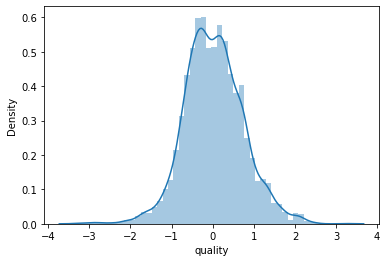

In [13]:
import seaborn as sns
sns.distplot(y-y_pred)